# Collaboration and Control

---

This notebook demonstrates a solution of the __P3-Collaboration and Competition Project__ of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893). 

__Author__: Uwe Bombosch<br/>
__Created__: February 2022

### 1. Start the Environment
Please refer to the installation instruction of the project's ``Readme.md`` file, if the cell below returns an error.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import torch

# Import own classes of the project
from agent import Agent
from model import Actor
import utilities as util
import p3_main

Next, we will start the environment.  Before running the code cell below, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Train the Agent

Training an agent in 1000 episodes.
Episode 100	Average Score: 0.01	Standard Deviation: 0.03
Episode 200	Average Score: 0.03	Standard Deviation: 0.06
Episode 300	Average Score: 0.06	Standard Deviation: 0.07
Episode 400	Average Score: 0.07	Standard Deviation: 0.08
Episode 500	Average Score: 0.14	Standard Deviation: 0.27
Episode 600	Average Score: 0.60	Standard Deviation: 1.14
Episode 700	Average Score: 2.28	Standard Deviation: 2.16
Episode 800	Average Score: 3.20	Standard Deviation: 2.21
Episode 900	Average Score: 2.98	Standard Deviation: 2.30
Episode 1000	Average Score: 2.88	Standard Deviation: 2.31


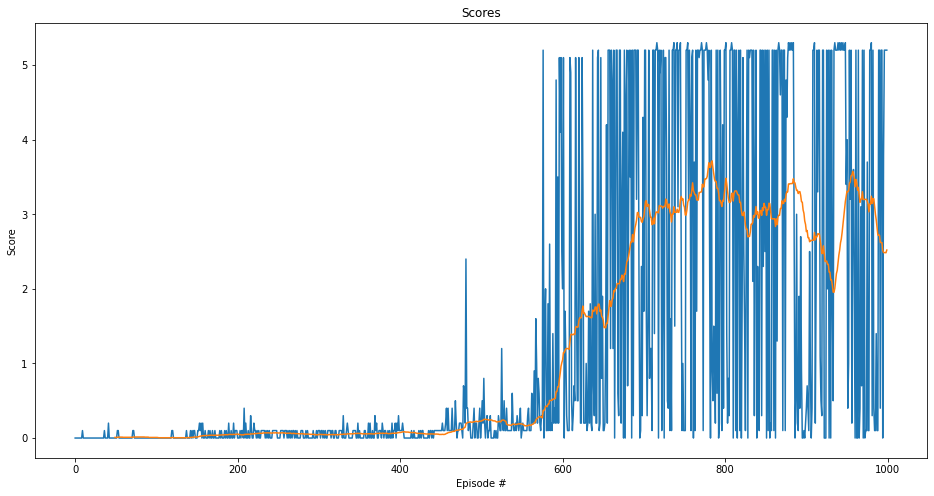

In [3]:
# Constrain randomness for repeatability
util.seeding()

# Create an agent; all necessary parameters will be silently read from utilities.
agent = Agent()

# Train the agent
print("Training an agent in {} episodes.".format(util.NBR_EPISODES))
scores = p3_main.train(env, agent)

util.plot_scores(scores)

In [4]:
# Write the trained agent to a file; don't execute, unless you wish to replace the trained agent 
# that is submitted as part of the solution.
agent.persist(filename='checkpoint.pth')

### 3. Test the Agent

In [5]:
# Create an empty agent object
agent = Agent()
# Load the parameters and neural network weights from a file
agent.load('checkpoint.pth')

Watch seven episodes with an **agent acting in a random way**

In [6]:
brain_name = env.brain_names[0]
for e in range(1, 8):                                      
    env_info = env.reset(train_mode=False)[brain_name]         # reset the environment    
    states = env_info.vector_observations                      # get the current state (for each agent)
    scores = np.zeros(2)                                       # initialize the score (for each agent)
    while True:
        actions = np.random.randn(2, util.ACTION_DIMENSION)    # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                      # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]               # send all actions to tne environment
        next_states = env_info.vector_observations             # get next state (for each agent)
        rewards = env_info.rewards                             # get reward (for each agent)
        dones = env_info.local_done                            # see if episode finished
        scores += env_info.rewards                             # update the score (for each agent)
        states = next_states                                   # roll over states to next time step
        if np.any(dones):                                      # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {:.2f}'.format(e, np.max(scores)))

Score (max over agents) from episode 1: 0.00
Score (max over agents) from episode 2: 0.00
Score (max over agents) from episode 3: 0.00
Score (max over agents) from episode 4: 0.10
Score (max over agents) from episode 5: 0.00
Score (max over agents) from episode 6: 0.00
Score (max over agents) from episode 7: 0.00


Watch seven episodes with the **trained agent taking actions**

In [6]:
N_TEST_EPISODES = 7
scores = []
for e in range(1, N_TEST_EPISODES + 1):
    env_info = env.reset(train_mode=False)[env.brain_names[0]]
    state = np.reshape(env_info.vector_observations, (1, 2*util.OBS_DIMENSION))
    scores = np.zeros(2) 
    while True:
        action = agent.act(state, add_noise=False)
        env_info = env.step(action)[env.brain_names[0]]
        next_state = np.reshape(env_info.vector_observations, (1, 2*util.OBS_DIMENSION))
        rewards = env_info.rewards
        done = any(env_info.local_done)
        scores += rewards
        state = next_state
        if done:
            break
    print('Score (max over agents) from episode {}: {:.2f}'.format(e, np.max(scores)))

Score (max over agents) from episode 1: 2.60
Score (max over agents) from episode 2: 2.60
Score (max over agents) from episode 3: 0.09
Score (max over agents) from episode 4: 2.60
Score (max over agents) from episode 5: 2.60
Score (max over agents) from episode 6: 0.10
Score (max over agents) from episode 7: 2.60


Prove that the trained agent reaches an average score of $\ge$ 0.5 in 100 episodes.

Episode 100	Average Score: 3.62	Standard Deviation: 2.38


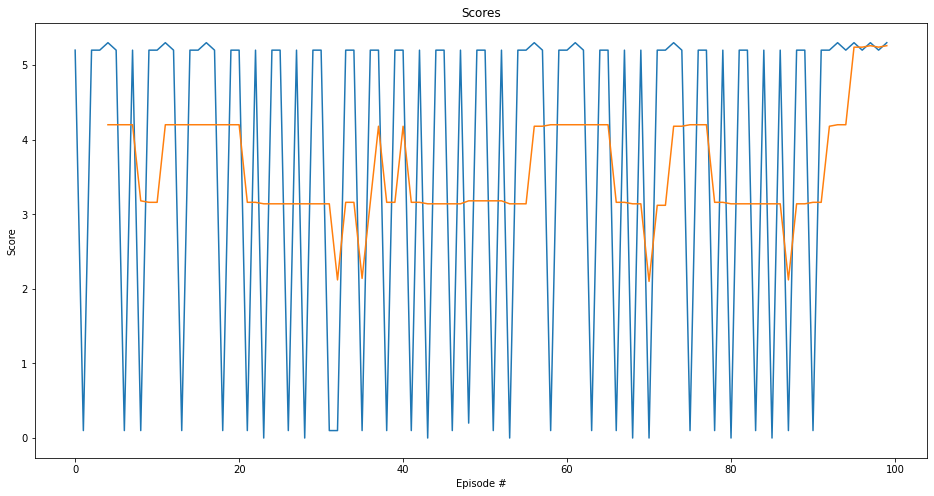

In [8]:
N_TEST_EPISODES = 100
scores = []
for i_episode in range(1, N_TEST_EPISODES + 1):
    env_info = env.reset(train_mode=True)[env.brain_names[0]]
    state = np.reshape(env_info.vector_observations, (1, 2*util.OBS_DIMENSION))
    score = 0
    while True:
        action = agent.act(state, add_noise=False)
        env_info = env.step(action)[env.brain_names[0]]
        next_state = np.reshape(env_info.vector_observations, (1, 2*util.OBS_DIMENSION))
        reward = np.max(env_info.rewards)
        done = any(env_info.local_done)
        score += reward
        state = next_state
        if done:
            scores.append(score)
            util.print_results(i_episode, score, end='\r')
            break
util.print_results(N_TEST_EPISODES, scores)
util.plot_scores(scores, rolling_window=5)